# Übung 1: Bildmanipulationen mit OpenCV und numpy 

### Einführung

In dieser Übung sollen einfache Bildoperationen mit OpenCV und numpy durchgeführt werden.

#### Dokumentation
Documentation von OpenCV gibt es auf:

https://docs.opencv.org/3.4.0/

und von numpy auf

https://docs.scipy.org/doc/numpy-1.13.0/index.html

(siehe auch das *Help* Menu im jupyter Fenster)

In [1]:
# OpenCV needs to be included first
import cv2
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt

# this makes the images a bit larger
mpl.rcParams['figure.dpi']= 200


### Aufgabe 1: Laden und Darstellung von Bildern

Die folgenden Zeilen laden ein Bild. Konvertieren Sie das Bild nach RGB und stellen Sie es dar.

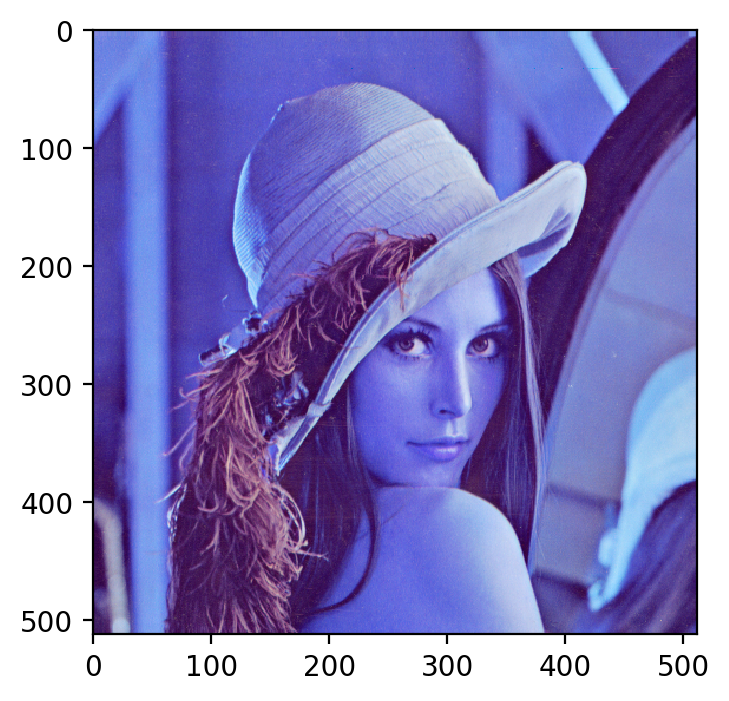

In [2]:
image = cv2.imread('images/lena_std.tif')
plt.imshow(image)
plt.show()


Spiegeln sie das Bild an der vertikalen und horizontalen Achse und stellen Sie die Bilder dar.

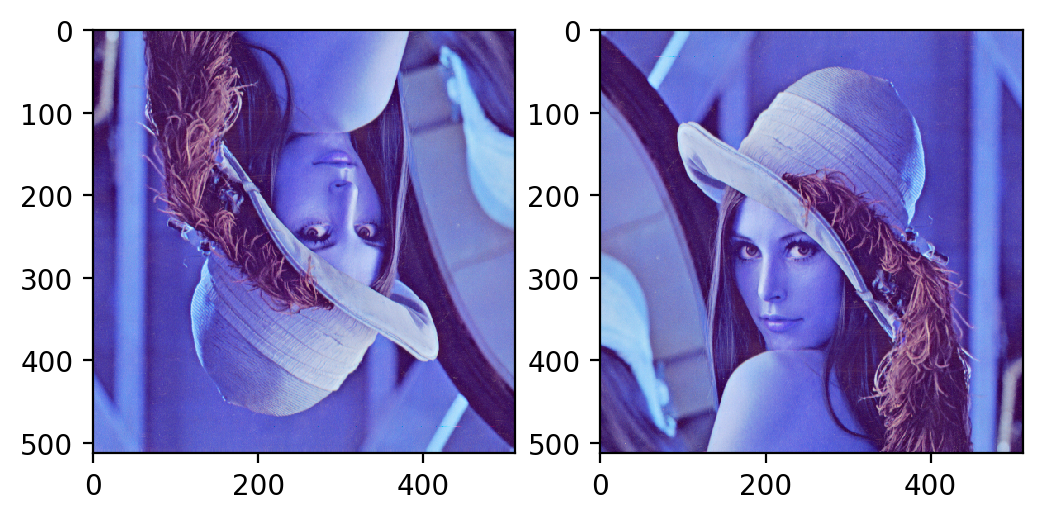

In [3]:
image_mirror_vert = cv2.flip(image, 0)
image_mirror_hor = cv2.flip(image, 1)
plt.subplot(1, 2, 1)
plt.imshow(image_mirror_vert)
plt.subplot(1, 2, 2)
plt.imshow(image_mirror_hor)
plt.show()

### Aufgabe 2: Darstellung von Grauwert Bilder
Konvertieren Sie das Bild in ein Grauwert Bild und stellen Sie dieses dar. Per default wird ein 1-Kanal Bild farbig mit einer default Color Map dargestellt. Um das Bild wirklich in grau zu zeichnen kann der Parameter `cmap='gray'` für `imshow` mitgegeben werden.

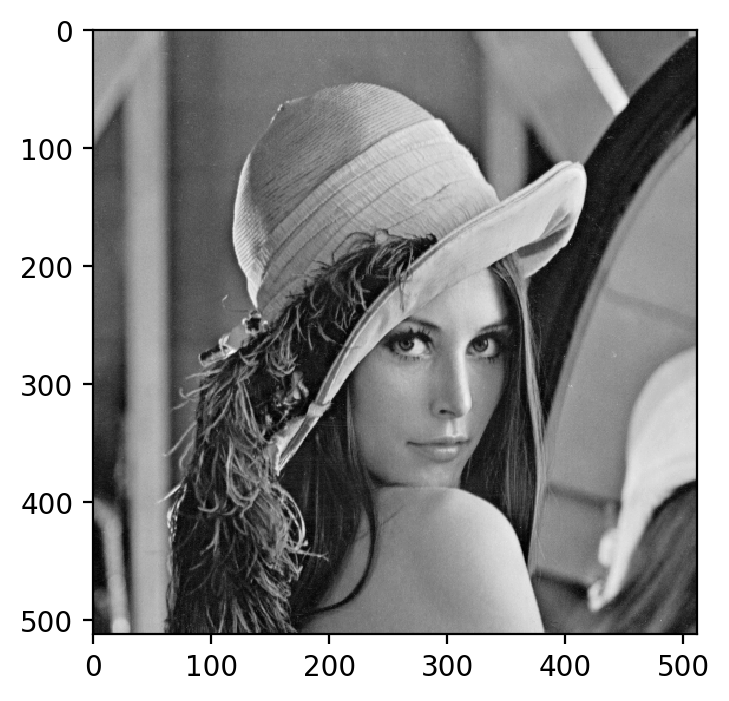

In [4]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')
plt.show()

### Aufgabe 3: Bild Kanäle
Stellen Sie die Anteile des rot, grün und blau Kanals einzeln (als Grauwert Bild) dar.

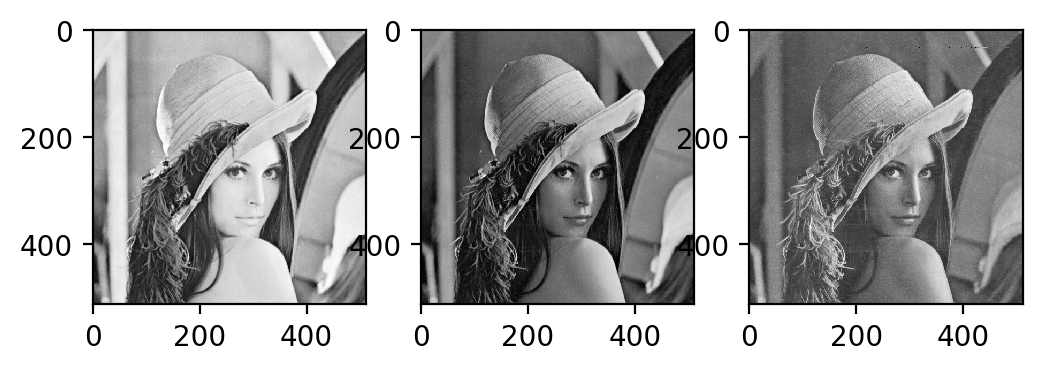

In [5]:
b, g, r = cv2.split(image)
image_red = r
image_green = g
image_blue = b
plt.subplot(1, 3, 1)
plt.imshow(image_red, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(image_green, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(image_blue, cmap='gray')
plt.show()

Erstellen Sie nun wieder ein Farbbilder aus den 3 Kanälen, sie können die Kanäle auch anders mischen. Verwenden Sie die numpy Funktion `stack`.

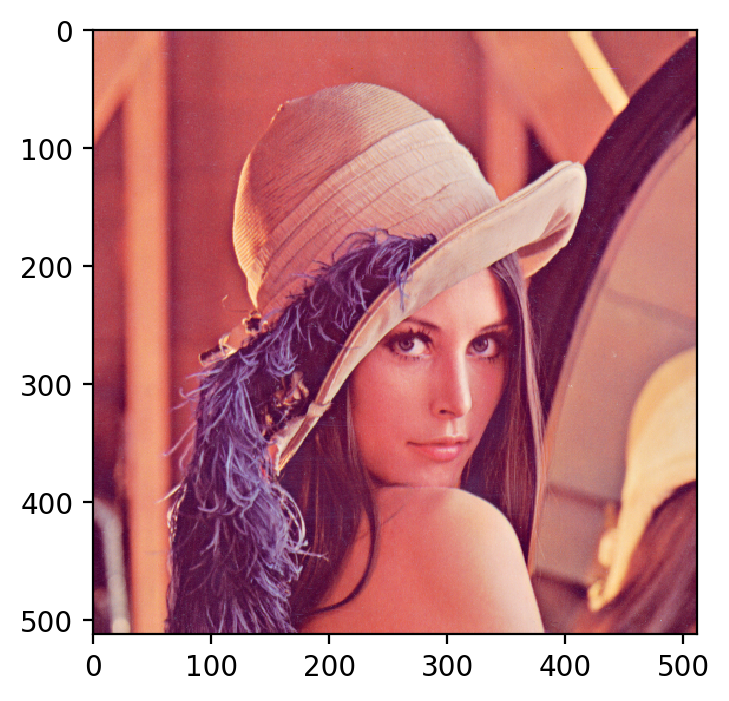

In [6]:
image_new = np.stack([r, g, b], axis=-1)
plt.imshow(image_new)
plt.show()

### Aufgabe 4: Plot einer Zeile

Stellen Sie die Bildwerte der Zeile 200 des Grauwert Bildes als Plot dar. Dazu müssen sie die Pixelwerte einer Zeile auslesen wobei Sie wiederum ein (1D) numpy Array erhalten. Dieses kann mit `plt.plot(...)` dargestellt werden. Entspricht das Ergebnis den Erwartungen?

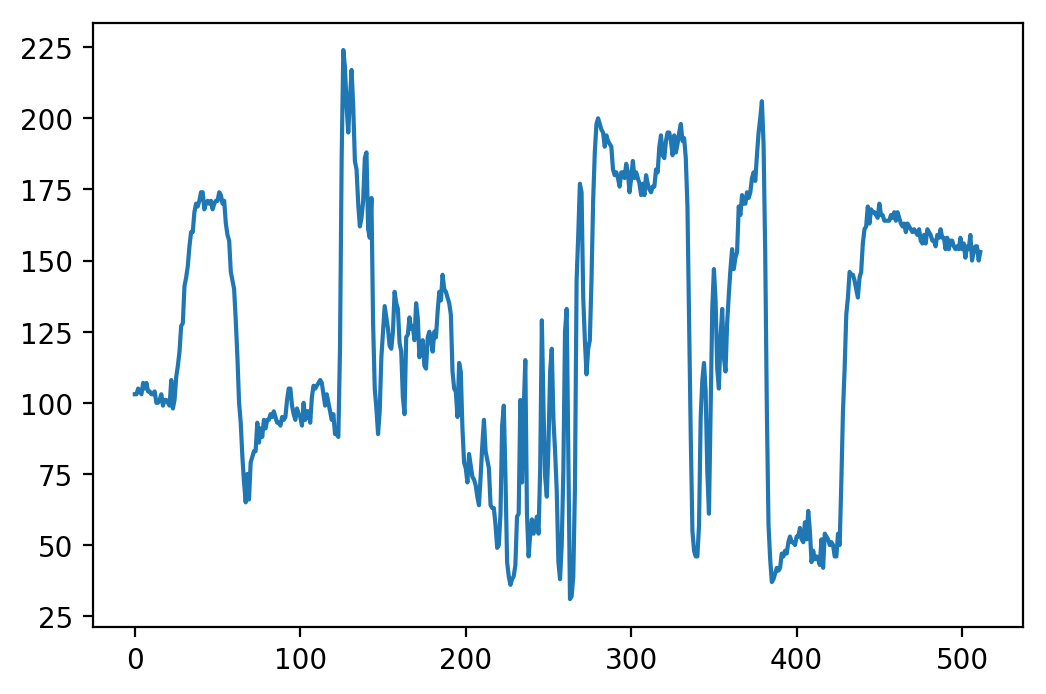

In [7]:
line = image_gray[200, :]
plt.plot(line)
plt.show()
# Legt man das Bild und den Plot mit gleicher Breite exakt untereinander,
# sieht man, dsas optische Übergänge (Hintergrund/Hut) jeweils mit grossen
# Ausschlägen im Plot übereinstimmen. Bei Flächen (Haut, Hintergrund)
# oszilliert die Kurve jeweils leicht, da eine Fläche in der realen Welt
# 

### Aufgabe 5: Histogramm und Histogramm Ausgleich

Das folgenden Bild hat einen schlechten Kontrast. Grauwert Bilder werden per default von OpenCV als 3-Kanal Bilder geladen. Was ist der minimale und maximale Pixelwert im Bild?

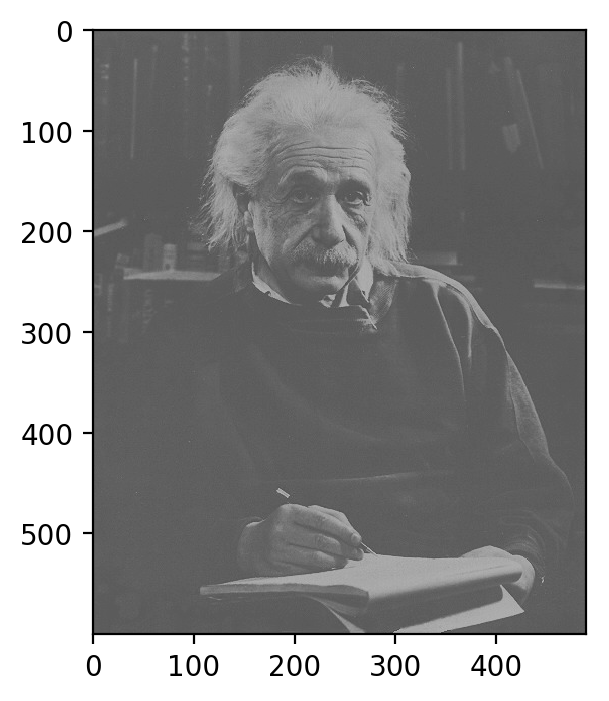

min: 74, max: 178


In [8]:
einstein = cv2.imread('images/EinsteinLowContrast.tif')
einstein_gray = cv2.cvtColor(einstein, cv2.COLOR_BGR2GRAY)
plt.imshow(einstein, cmap='gray')
plt.show()
colors = einstein_gray.flatten().tolist()
min = min(colors)
max = max(colors)
print('min: {}, max: {}'.format(min, max))

Stellen Sie das Histogramm des Bildes dar. Benutzen Sie dazu die OpenCV Funktion `cv2.calcHist(...)`. Benutzen Sie die OpenCV Dokumentation um die Parameter der Funktion zu ermitteln.


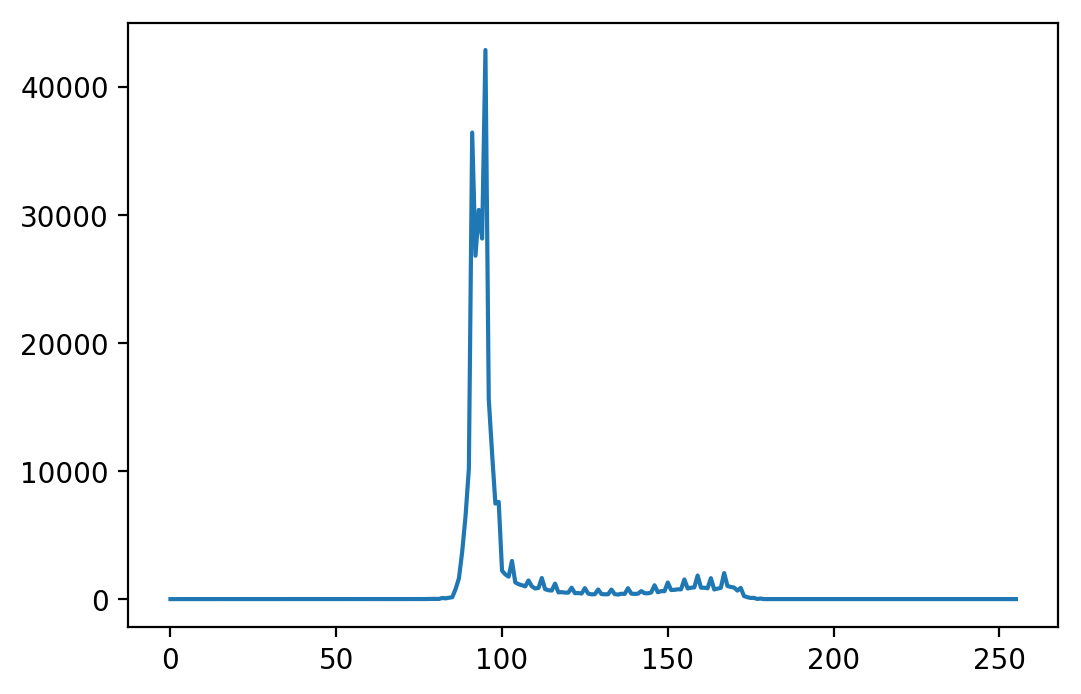

In [9]:
hist = cv2.calcHist([einstein_gray], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

Führen Sie einen Histogram Ausgleich mit der Funktion `equalizeHist(...)` durch und stellen Sie das Bild und das Histogram des veränderten Bildes dar.

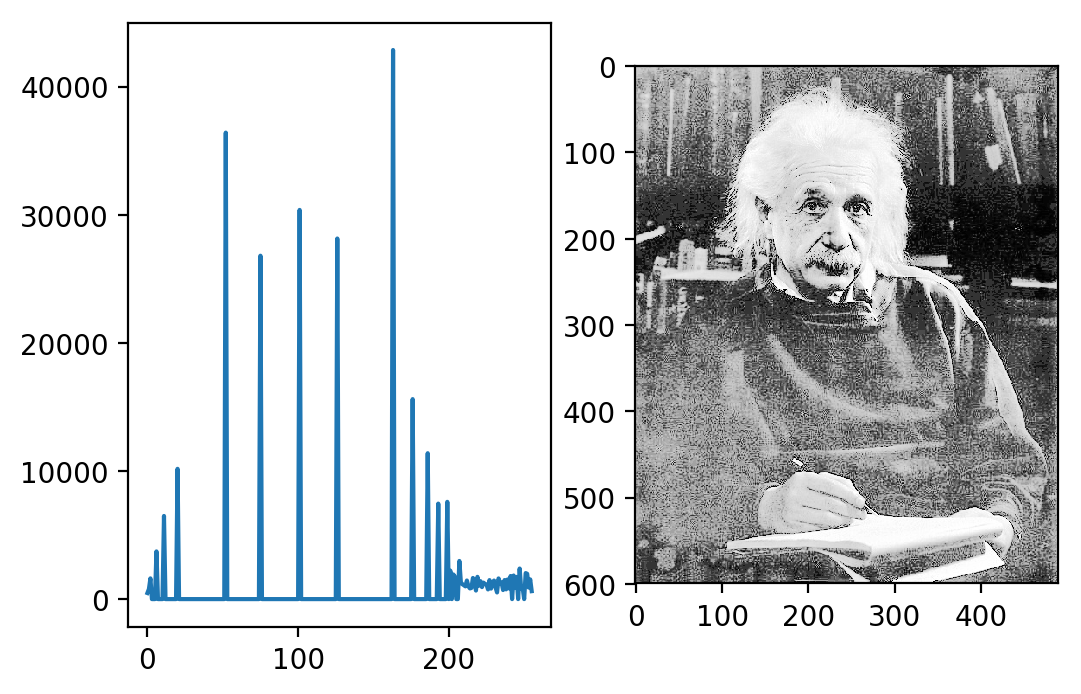

In [10]:
einstein_equal = cv2.equalizeHist(einstein_gray)
hist2 = cv2.calcHist([einstein_equal], [0], None, [256], [0,256])
plt.subplot(1, 2, 1)
plt.plot(hist2)
plt.subplot(1, 2, 2)
plt.imshow(np.stack([einstein_equal, einstein_equal, einstein_equal], axis=2))
plt.show()

### Aufgabe 6: Punktbildfunktionen

In der nächsten Zelle ist eine Funktion definert, die als Eingabe ein Bild enthält, und ein verändertes Bild zurückgibt. Ändern Sie die Funktion, sodass das Bild heller (oder dunkler) wird.

In [11]:
def f(x):
    darker = x.copy()
    darker[:, :] = darker[:, :] - 80
    return darker

In [12]:
plt.subplot(2,2,1)
plt.imshow(einstein_gray, cmap='gray')
hist = cv2.calcHist([einstein_gray], [0], None, [256], [0, 256])
plt.subplot(2,2,3)
plt.plot(hist)

result = f(einstein_gray)
plt.subplot(2,2,2)
plt.imshow(result, cmap='gray')
hist2 = cv2.calcHist([result], [0], None, [256], [0, 256])
plt.subplot(2,2,4)
plt.plot(hist2)
plt.show()